In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('olympics.csv')
df.head()

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
df.loc[df[~df['Medal'].isna()].index, 'count_Medal'] = 1

<AxesSubplot:ylabel='Age'>

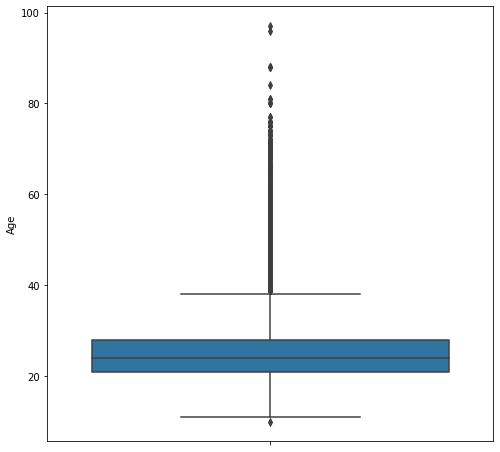

In [4]:
# Boxplot
plt.figure(figsize=(8, 8))
sbn.boxplot(data=df, y='Age')

In [5]:
## Ortalama değerinden 3 standard sapma uzağındaki değerleri outlier olarak adlandırıyoruz ve veri setimizden atıyoruz.
columns = ['Age','Weight','Height']

for column in columns:
    selected_column = df[column]

    std = selected_column.std()
    avg = selected_column.mean()

    three_sigma_plus = avg + (3 * std)
    three_sigma_minus = avg - (3 * std)

    outliers = selected_column[((selected_column > three_sigma_plus) | (selected_column < three_sigma_minus))].index

    index = df.loc[outliers]['Sport'].value_counts().index
    values = df.loc[outliers]['Sport'].value_counts().values

    print(f'{column}',len(outliers))

    df.drop(index= outliers, inplace= True)

Age 4406
Weight 2133
Height 792


<AxesSubplot:ylabel='Age'>

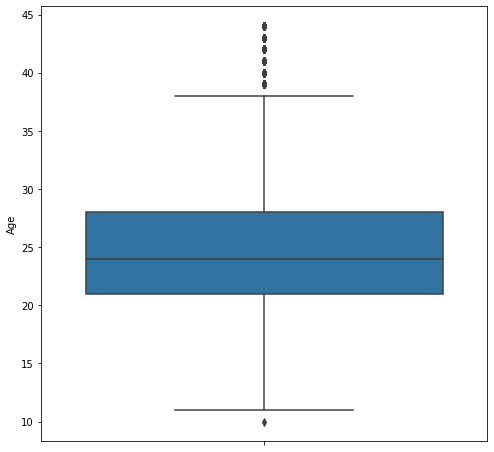

In [6]:
# Boxplot
plt.figure(figsize=(8, 8))
sbn.boxplot(data=df, y='Age')

In [7]:
## Madalya kazanamayan değerleri veriden atıyoruz.
df = df.drop(df[df['Medal'].isna()].index,axis=0)

In [8]:
## Bazı eventlerin içersindeki verilerin hepsi nan olduğu için spesifik event ortalaması ile dolduramıyoruz.
df['Height'] = df.groupby('Event')['Height'].apply(lambda x: x.fillna(x.mean()))
df['Weight'] = df.groupby('Event')['Weight'].apply(lambda x: x.fillna(x.mean()))
 
mean_Height = df['Height'].mean() ## Full veri ortalaması
mean_Weight = df['Weight'].mean() ## Full veri ortalaması

## Spesifik ortalama ile doldurulamadığı için bütün verinin ortalaması ile dolduruyoruz.
df['Height'] = df.groupby('Event')['Height'].apply(lambda x: x.fillna(mean_Height))
df['Weight'] = df.groupby('Event')['Weight'].apply(lambda x: x.fillna(mean_Weight))

In [9]:
df['Age'] = df.groupby('Event')['Age'].apply(lambda x: x.fillna(x.mean()))
df.drop(df[df['Age'].isna()].index,axis=0,inplace=True)

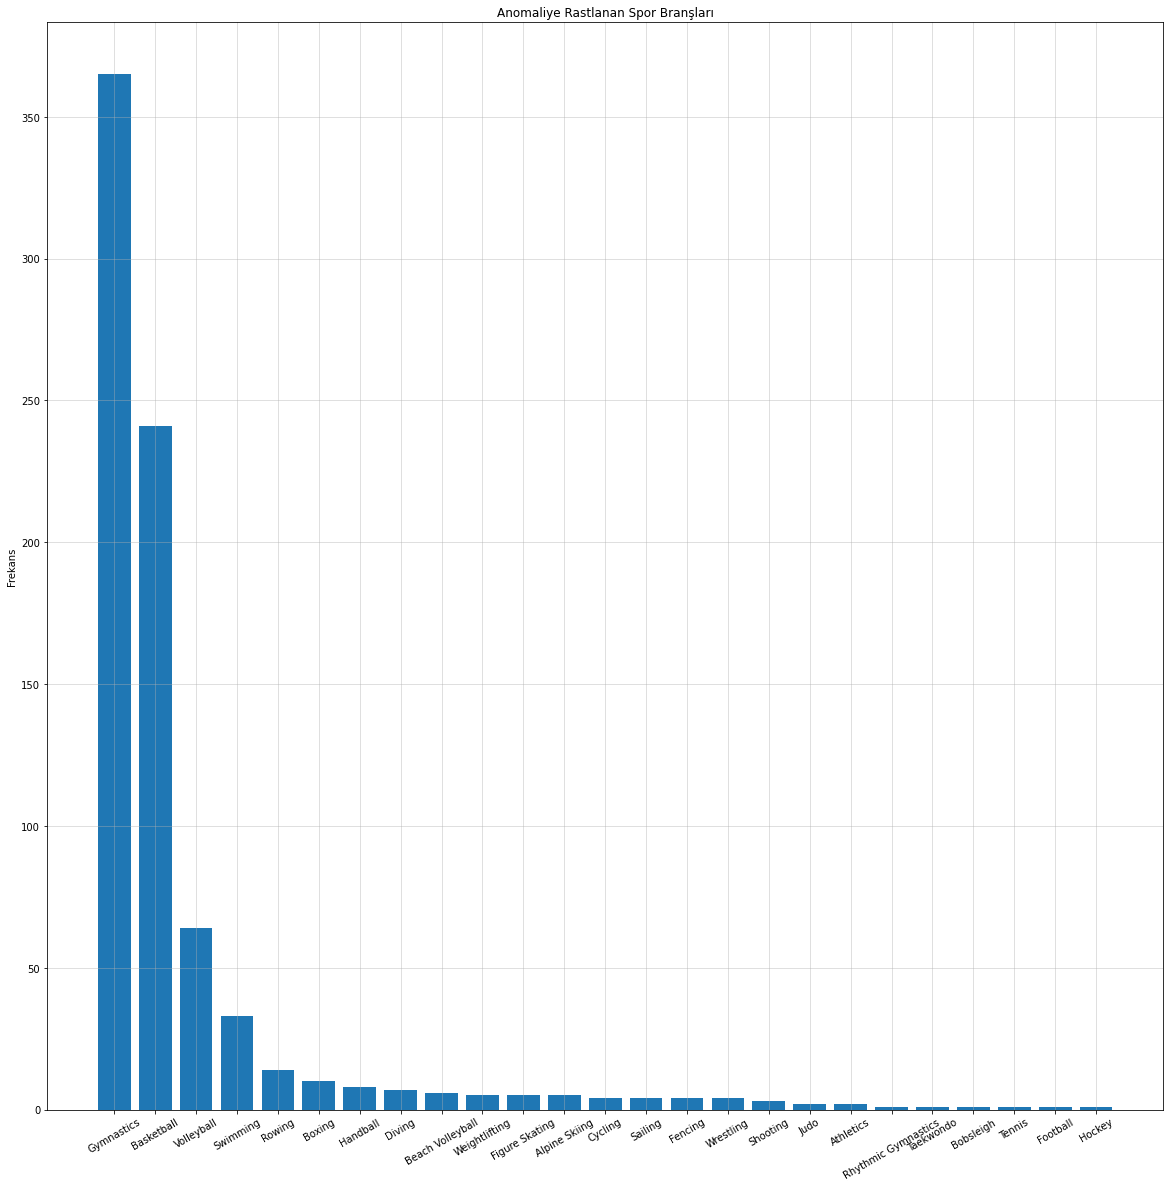

In [10]:
plt.figure(figsize=(20,20))
plt.bar(index,values)
plt.xticks(rotation=30)
plt.title("Anomaliye Rastlanan Spor Branşları")
plt.ylabel("Frekans")
plt.grid(True,alpha=0.5)

<AxesSubplot:xlabel='Team'>

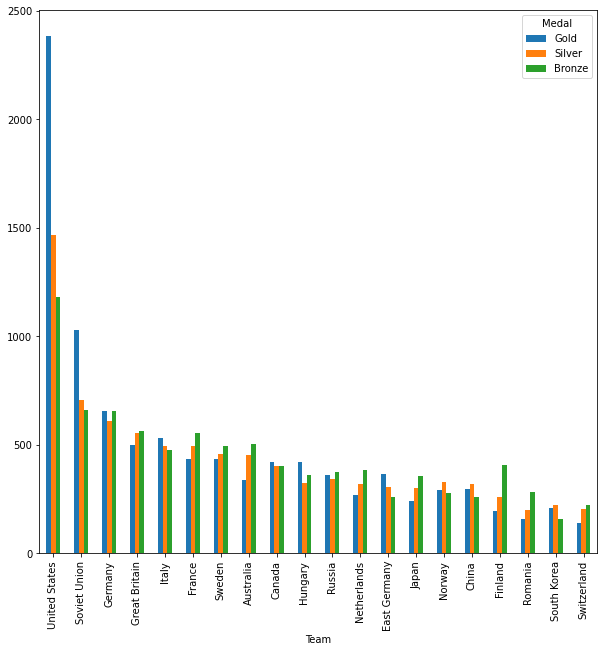

In [11]:
df_pivot = df.pivot_table('count_Medal',index='Team',columns='Medal',aggfunc='count').fillna(0).astype(int)
df_pivot['Sum'] = df_pivot[df_pivot['Gold'] != 0][df_pivot['Silver'] != 0][df_pivot['Bronze'] != 0].T.sum()
df_pivot.sort_values('Sum',ascending=False)[['Gold','Silver','Bronze']][:20].plot(kind='bar',figsize=(10,10))

<AxesSubplot:xlabel='Team'>

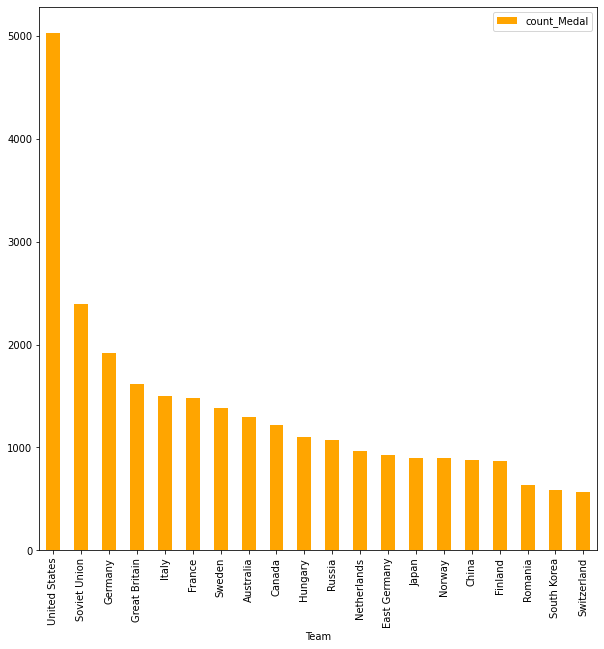

In [12]:
df.groupby('Team').sum()[['count_Medal']].sort_values('count_Medal',ascending=False)[:20].plot(kind='bar',figsize=(10,10),color='orange')

<AxesSubplot:xlabel='Year'>

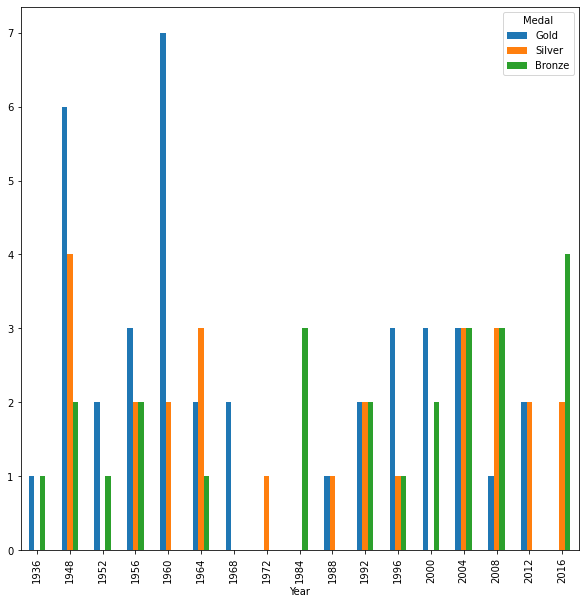

In [13]:
df[df['Team'] == 'Turkey'][~df['Medal'].isna()].pivot_table('count_Medal',index='Year',columns='Medal',aggfunc='count').fillna(0).astype(int)[['Gold','Silver','Bronze']].plot(kind='bar',figsize=(10,10))

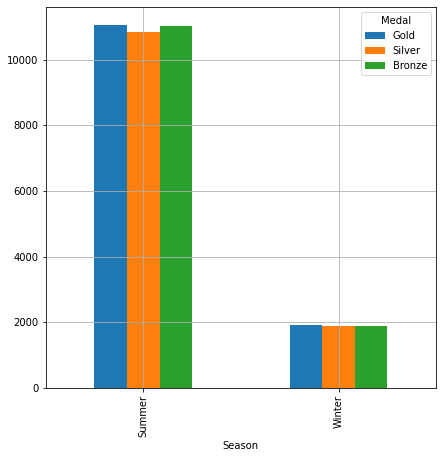

In [14]:
df.pivot_table('count_Medal',index='Season',columns='Medal',aggfunc='count')[['Gold','Silver','Bronze']].plot(kind='bar',figsize=(7,7))
plt.grid(True)

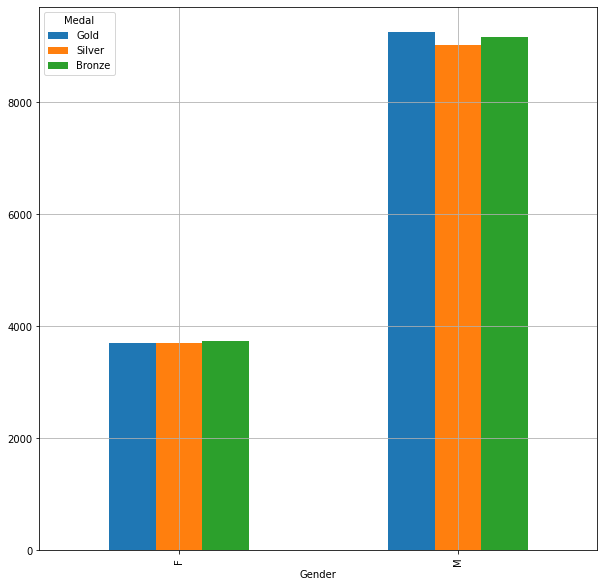

In [15]:
df.pivot_table('count_Medal',index='Gender',columns='Medal',aggfunc='count')[['Gold','Silver','Bronze']].plot(kind='bar',figsize=(10,10))
plt.grid(True)

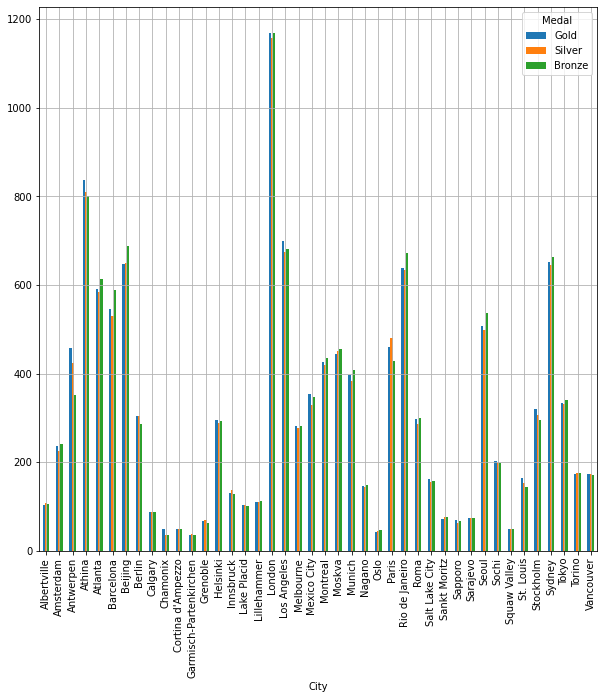

In [16]:
df.pivot_table('count_Medal',index='City',columns='Medal',aggfunc='count')[['Gold','Silver','Bronze']].plot(kind='bar',figsize=(10,10))
plt.grid(True)

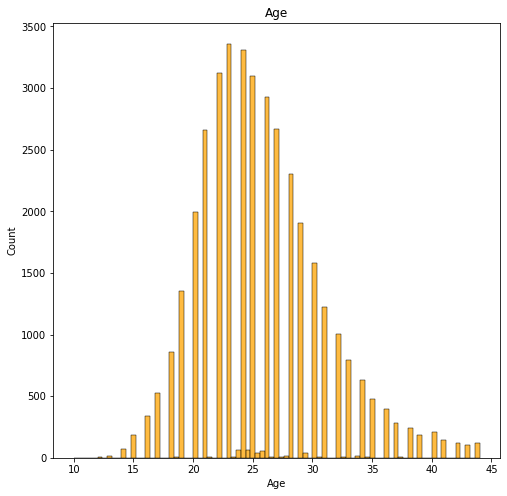

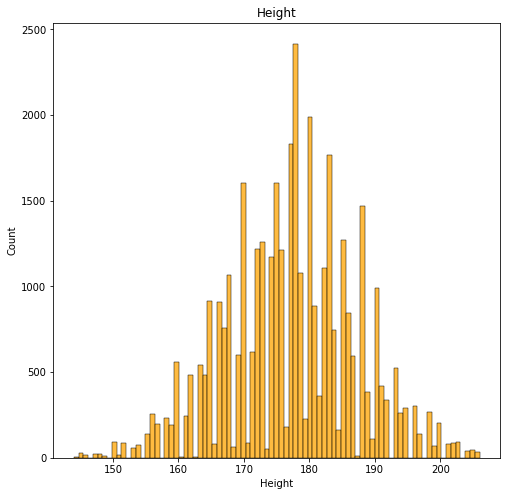

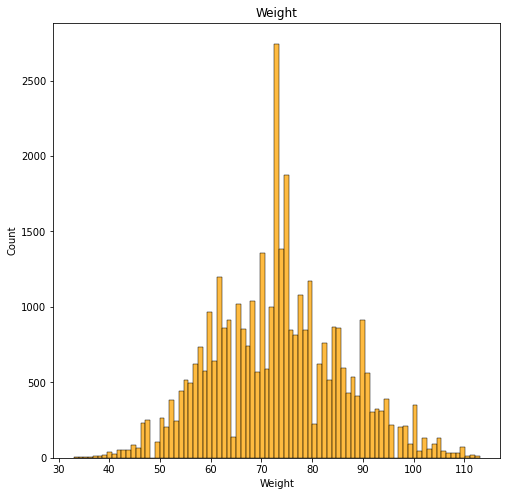

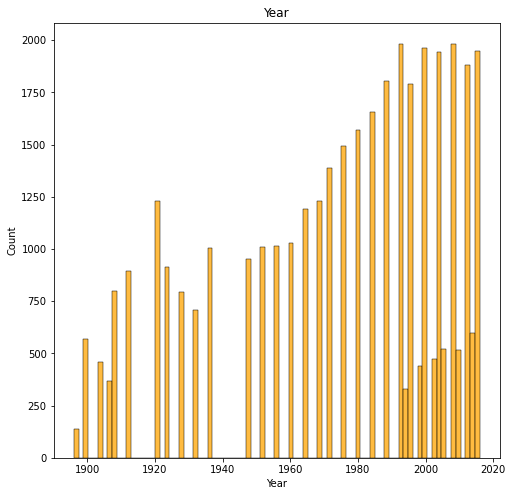

In [17]:
# Histplot
_list = ['Age', 'Height', 'Weight', 'Year']
for i in _list:
    plt.figure(figsize=(8, 8))
    sbn.histplot(df[i], bins=85, color='Orange')
    plt.title(i)
    plt.show()

<AxesSubplot:ylabel='Age'>

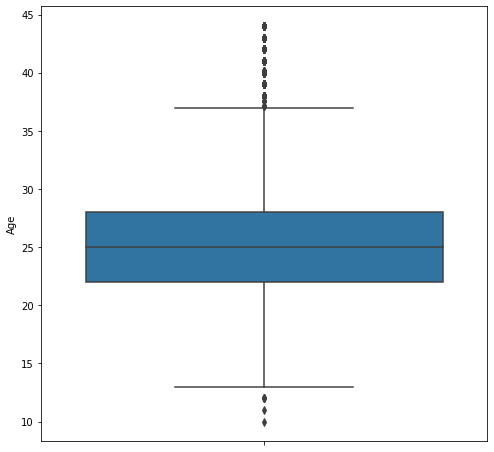

In [18]:
# Boxplot
plt.figure(figsize=(8, 8))
sbn.boxplot(data=df, y='Age')

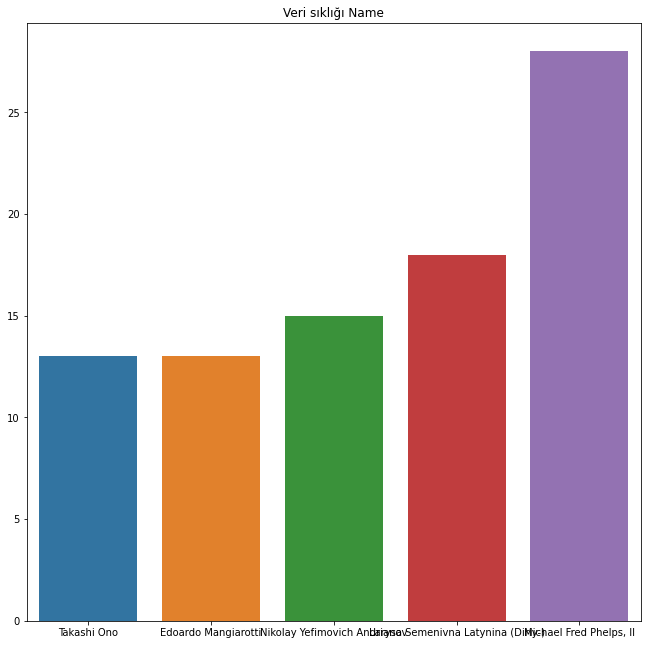

Michael Fred Phelps, II               28
Larysa Semenivna Latynina (Diriy-)    18
Nikolay Yefimovich Andrianov          15
Edoardo Mangiarotti                   13
Takashi Ono                           13
Name: Name, dtype: int64


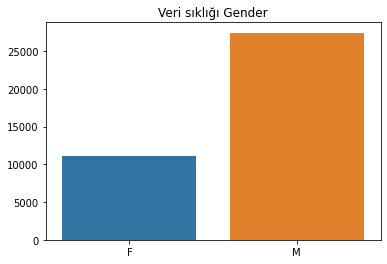

M    27432
F    11143
Name: Gender, dtype: int64


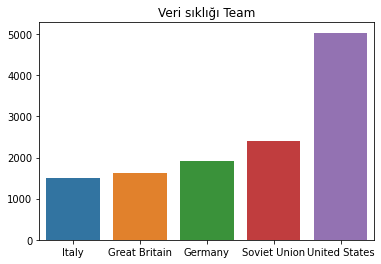

United States    5033
Soviet Union     2391
Germany          1921
Great Britain    1615
Italy            1501
Name: Team, dtype: int64


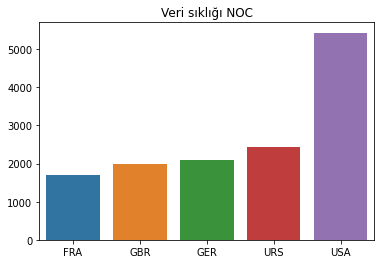

USA    5432
URS    2443
GER    2093
GBR    1995
FRA    1691
Name: NOC, dtype: int64


In [19]:
# Barplot
_list = ["Name","Gender","Team","NOC"]
plt.figure(figsize=(11, 11))
for i in _list:
    x = df[i].value_counts().sort_values()[-5:].index
    y = df[i].value_counts().sort_values()[-5:].values
    sbn.barplot(data=df, x=x,y=y)
    plt.title(f'Veri sıklığı {i}')
    plt.show()
    print(df[i].value_counts()[:5])

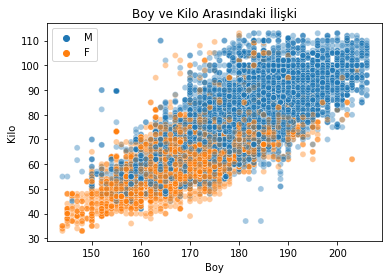

In [20]:
# Scatterplot
sbn.scatterplot(x=df['Height'],y=df['Weight'],hue='Gender',data=df,alpha=0.4)
plt.xlabel("Boy")
plt.ylabel("Kilo")
plt.title("Boy ve Kilo Arasındaki İlişki")
plt.legend()
plt.show()

In [21]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

_list = ['Gender','Season']
for i in _list:
    df = pd.get_dummies(df,columns=[i])

_list = ['Team','City','Sport','Event','NOC','Year']
for i in _list:
    df[i] = label.fit_transform(df[i])
    df[i] = df[i].astype('category')

# _list = ['Age','Height','Weight']
# for i in _list:
#     df[i] = df[i].astype('int')

df.drop(['Name','Games','count_Medal','ID','Age','Height','Weight'],axis=1,inplace=True)
df.head()

,Team,NOC,Year,City,Sport,Event,Medal,Gender_F,Gender_M,Season_Summer,Season_Winter
3,105,31,1,26,61,685,Gold,0,1,1,0
37,142,42,6,2,54,612,Bronze,0,1,1,0
38,142,42,6,2,54,625,Bronze,0,1,1,0
40,142,42,33,34,30,379,Bronze,0,1,0,1
41,142,42,11,17,27,353,Bronze,0,1,1,0


In [22]:
def anyway(df):
    if df == 'Gold':
       return 1
    elif df == 'Silver':
       return 2
    else:
       return 3

In [23]:
df['Medal'] = df['Medal'].apply(anyway)

In [24]:
df = df.reset_index(drop='index')

In [25]:
df.head()

,Team,NOC,Year,City,Sport,Event,Medal,Gender_F,Gender_M,Season_Summer,Season_Winter
0,105,31,1,26,61,685,1,0,1,1,0
1,142,42,6,2,54,612,3,0,1,1,0
2,142,42,6,2,54,625,3,0,1,1,0
3,142,42,33,34,30,379,3,0,1,0,1
4,142,42,11,17,27,353,3,0,1,1,0


In [26]:
x = df.drop(['Medal'],axis=1).values
y = df['Medal'].values.reshape(-1,1)

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=55)

In [28]:
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier(learning_rate=0.5)
lgb_model.fit(x_train,y_train)

LGBMClassifier(learning_rate=0.5)

<AxesSubplot:>

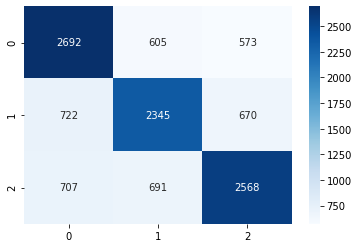

In [29]:
from sklearn.metrics import confusion_matrix

y_pred = lgb_model.predict(x_test)

cf_matrix = confusion_matrix(y_test, y_pred)

sbn.heatmap(cf_matrix, annot=True, cmap='Blues',fmt='d')

In [30]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.6571329819407241